In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read dataframe according to the provided dtypes
df_dtypes = pd.read_csv("data/df_dtypes.csv", index_col="Column")
df_dtypes_dict = df_dtypes.to_dict()["Dtype"]
del df_dtypes_dict["PayAccDate"]
del df_dtypes_dict["InsDate"]
df = pd.read_csv(
  "data/df.csv",
  parse_dates=["PayAccDate", "InsDate"],
  dtype=df_dtypes_dict,
  index_col="HouseId",
)

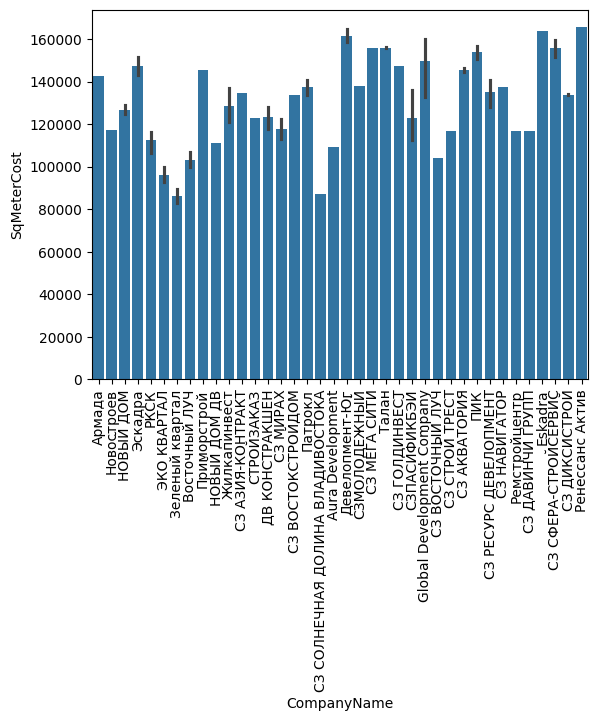

In [3]:
# CompanyName seems to be significant
ax = sns.barplot(
  data=df,
  x="CompanyName",
  y="SqMeterCost",
  errorbar=("ci", 95),
)
ax.tick_params(axis="x", rotation=90)

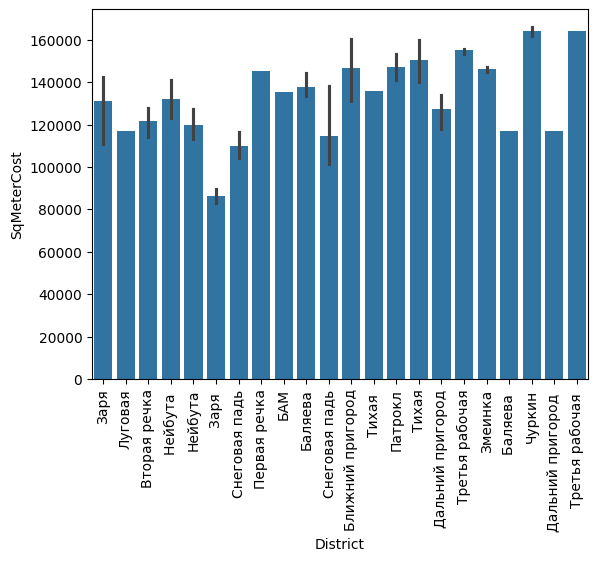

In [4]:
# District seems to be significant
ax = sns.barplot(
  data=df,
  x="District",
  y="SqMeterCost",
  errorbar=("ci", 95),
)
ax.tick_params(axis="x", rotation=90)

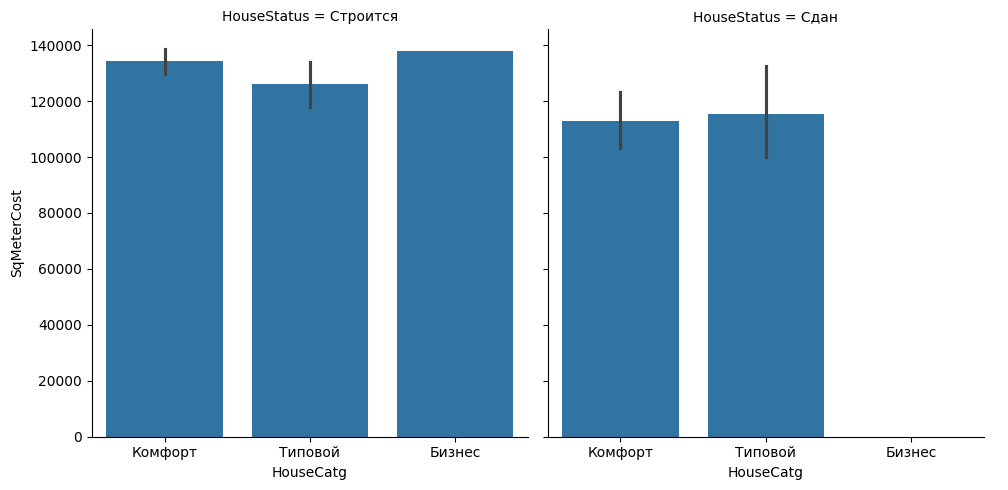

In [7]:
# HouseCatg and HouseStatus aren't significant
fig = sns.catplot(
  data=df,
  kind="bar",
  x="HouseCatg",
  y="SqMeterCost",
  col="HouseStatus",
  errorbar=("ci", 95),
)

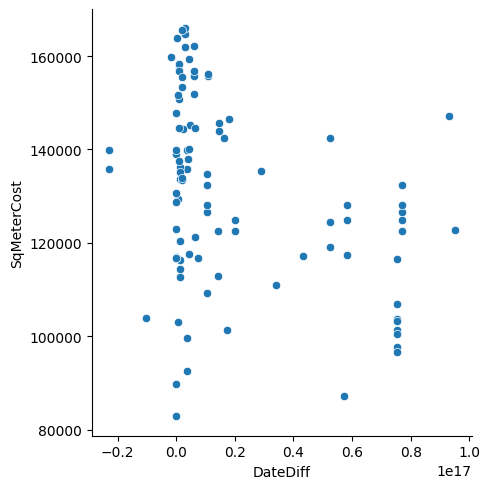

In [6]:
# dates are insignificant
df["DateDiff"] = df["InsDate"] - df["PayAccDate"]
sns.relplot(data=df, x="DateDiff", y="SqMeterCost")